In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "data/MPDataset_MPDS2024a.csv"
df = pd.read_csv(file_path)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_2116/357212624.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [37]:
# Display the first few rows of the DataFrame
df.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,NaN,9.60,1.9,1.900,0.0,1.900,2024a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,...,NaN,NaN,NaN,-37.80,3.3,2.200,33.4,5.600,2024a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,11420,People’s Party,FP,40,...,NaN,NaN,NaN,9.50,3.2,6.400,14.3,1.600,2024a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,11620,Right Party,NaN,60,...,NaN,NaN,NaN,28.00,1.8,22.800,10.6,0.000,2024a,YMKVN2
4,11,Sweden,0,0,17/09/1944,194409,11810,Agrarian Party,NaN,80,...,NaN,NaN,NaN,23.81,0.0,19.048,0.0,4.762,2024a,U4SCRD


In [38]:
# Corrige nombre de Se
# Count the number of changes
count_changes = df.loc[df['candidatename'].notna() & df['candidatename'].str.contains('Piñera'), 'candidatename'].count()

# Replace the values
df.loc[df['candidatename'].notna() & df['candidatename'].str.contains('Piñera'), 'candidatename'] = 'Sebastián Piñera Echeñique'

# Print the number of changes
print(f"Number of changes: {count_changes}")

Number of changes: 3


#### Crear campo 'agno' para registrar el año del programa de gobierno

In [39]:
# Insert column 'agno' into the dataframe, of type int, to the right of column 'date'
df.insert(df.columns.get_loc('date') + 1, 'agno', df['edate'].str[-4:].astype(int))

# List unique values of new column 'agno'
unique_agno_values = df['agno'].unique()
#print(unique_agno_values)

In [40]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [41]:
# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns = ['countryname', 'candidatename', 'agno', 'presvote'] + [col for col in df.columns if col.startswith('per') and col[3].isdigit()]
#per_columns

#### PROMEDIO PONDERADO: en 'df' filtramos registros de Chile, separamos por año de elección y calculamos valores representativos basados en el promedio ponderado por el % obtenido en la elección presidencial (presvote)

In [42]:
# Filter df by 'countryname' == 'Chile'
df_Chile = df[df['countryname'] == 'Chile']

df_Chile = df_Chile.sort_values(by='agno')

# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns_4digit = [col for col in df.columns if col.startswith('per') and col[3].isdigit()]

# Group by column 'agno' and calculate the weighted average of each column in 'per_columns_4digit' using column 'presvote' as weights
df_Chile_ponderado = df_Chile.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['presvote']) for col in per_columns_4digit})
).reset_index()

# Display the results
df_Chile_ponderado

,agno,per101,per102,per103,per104,per105,per106,per107,per108,per109,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,1989,0.367161,0.049098,0.204681,2.241851,0.898452,0.567973,4.764237,0.913344,0.420679,...,0.981203,0.273091,0.340951,0.000000,0.136270,0.000000,0.000000,0.000000,1.538705,0.000000
1,1993,0.289693,0.037331,0.000000,1.127951,0.206192,0.209040,3.254579,0.721319,0.037331,...,1.866414,0.137227,0.000000,0.068965,0.034483,0.000000,0.000000,0.000000,2.902561,0.000000
2,1999,0.056430,0.126620,0.000000,2.584547,0.393984,0.112347,1.348291,0.351827,0.000000,...,1.588358,0.000000,0.449626,0.000000,1.152555,0.000000,0.000000,0.000000,2.163017,0.000000
3,2005,0.501296,0.000000,0.108972,1.237788,0.586723,0.361019,2.251643,0.646983,0.425330,...,1.451055,0.567666,0.134203,0.033551,1.563993,0.000000,0.000000,0.000000,0.783858,0.000000
4,2009,0.005651,0.000000,0.174377,0.897141,0.376400,0.029600,1.546047,0.789124,0.050161,...,0.631070,0.000000,0.000000,0.022030,2.946260,0.000000,0.000000,0.000000,2.101008,0.000000
5,2013,0.207215,0.000000,0.000000,0.966870,0.330345,0.055490,0.421749,1.206564,0.022495,...,0.389431,0.000000,0.016884,0.000000,2.622056,0.000000,0.000000,0.000000,1.865988,0.000000
6,2017,0.120377,0.007759,0.032650,0.457728,0.192404,0.146080,0.654128,0.359964,0.101033,...,4.289776,0.248078,0.966183,0.072217,0.835250,0.000000,0.077258,0.007098,0.878473,0.000000
7,2021,0.038239,0.015586,0.059179,0.688266,0.217654,0.086899,0.766963,0.170824,0.320040,...,0.989899,0.198364,0.400399,0.017372,0.882890,0.020617,0.005839,0.043345,1.705175,0.014016


#### Aspecto a analizar: INCLUSIÓN Y MINORÍAS (503, 705, 201_2) 

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_2116/2500185160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_inclymin['Total'] = df_Chile_inclymin['per503'] + df_Chile_inclymin['per705'] + df_Chile_inclymin['per201_2']


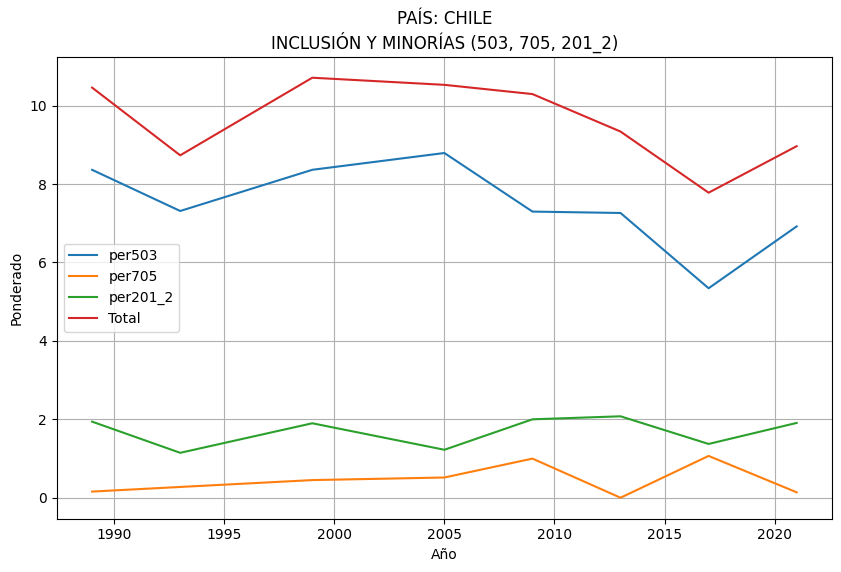

In [60]:
# Create dataframe 'df_Chile_inclymin' from 'df_Chile_ponderado' with columns 'agno', 'per503', 'per705'
df_Chile_inclymin = df_Chile_ponderado[['agno', 'per503', 'per705', 'per201_2']]

# Add a new column 'Total' with the sum of columns 'per503', 'per705' and 'per201_2'
df_Chile_inclymin['Total'] = df_Chile_inclymin['per503'] + df_Chile_inclymin['per705'] + df_Chile_inclymin['per201_2']

# Plot columns per503, per705, per201_2,  Total with agno in the horizontal axis
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['per503'], label='per503')
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['per705'], label='per705')
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['per201_2'], label='per201_2')
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label='Total')

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title('PAÍS: CHILE\nINCLUSIÓN Y MINORÍAS (503, 705, 201_2)')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
df_Chile_inclymin

,agno,per503,per705,per201_2,Total
0,1989,8.360642,0.156720,1.939747,10.457108
1,1993,7.311582,0.274453,1.145095,8.731130
2,1999,8.361796,0.449626,1.898366,10.709788
3,2005,8.789974,0.515604,1.222722,10.528299
4,2009,7.296178,0.997248,1.999458,10.292885
5,2013,7.260687,0.000000,2.076149,9.336836
6,2017,5.341153,1.065976,1.371141,7.778271
7,2021,6.918945,0.138109,1.907213,8.964267


### *** MODIFICAR CÓDIGO PARA USAR PRESVOTE O PERVOTE SEGÚN SEA EL CASO

#### Alemania

In [55]:
df_Alemania = df[df['countryname'] == 'Germany']

df_Alemania = df_Alemania.sort_values(by='agno')

# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns_4digit = [col for col in df.columns if col.startswith('per') and col[3].isdigit()]

# Group by column 'agno' and calculate the weighted average of each column in 'per_columns_4digit' using column 'presvote' as weights
df_Alemania_ponderado = df_Alemania.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['pervote']) for col in per_columns_4digit})
).reset_index()

# Display the results
df_Alemania_ponderado.head()

,agno,per101,per102,per103,per104,per105,per106,per107,per108,per109,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,1949,1.151948,2.472702,0.0,0.120293,0.291606,0.207928,0.069289,1.082162,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1953,3.020712,0.555393,0.0,0.826984,0.437284,1.161031,0.041421,2.715646,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1957,4.783425,1.003888,0.0,3.298744,6.580846,1.244326,0.502114,3.499646,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1961,5.800360,2.040600,0.0,3.924717,1.914137,0.000000,3.283657,1.690999,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1965,9.107959,1.393901,0.0,1.928386,0.418171,1.812692,1.323660,4.575641,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_2116/3453244782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Alemania_inclymin['Total'] = df_Alemania_inclymin['per503'] + df_Alemania_inclymin['per705']


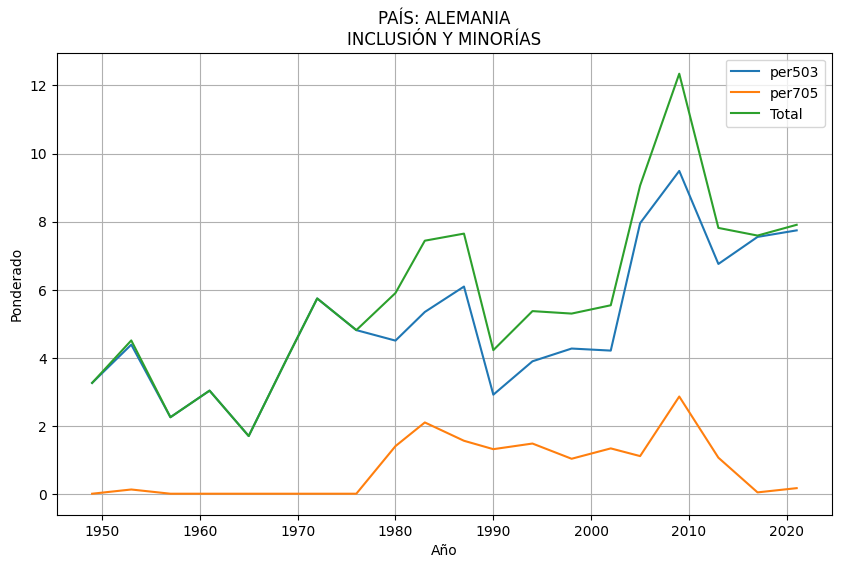

In [56]:
# Create dataframe
df_Alemania_inclymin = df_Alemania_ponderado[['agno', 'per503', 'per705']]

# Add a new column 'Total' with the sum of columns 'per503' and 'per705'
df_Alemania_inclymin['Total'] = df_Alemania_inclymin['per503'] + df_Alemania_inclymin['per705']

# Plot columns per503, per705, Total with agno in the horizontal axis
plt.figure(figsize=(10, 6))
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['per503'], label='per503')
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['per705'], label='per705')
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['Total'], label='Total')

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title('PAÍS: ALEMANIA\nINCLUSIÓN Y MINORÍAS')
plt.legend()
plt.grid(True)
plt.show()

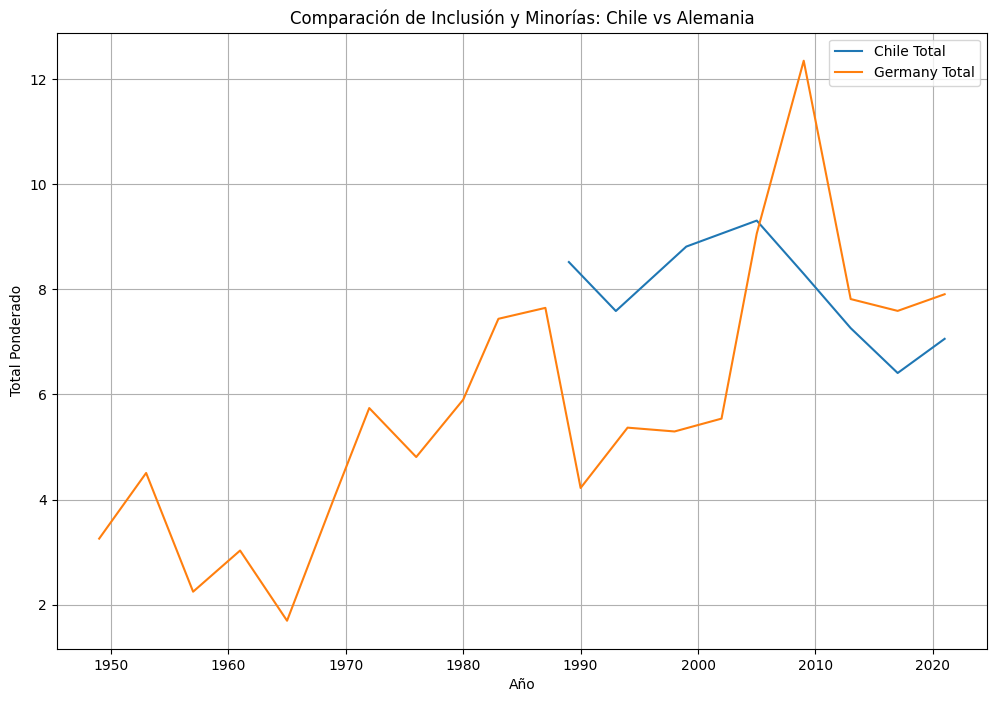

In [57]:
plt.figure(figsize=(12, 8))

# Plot 'Total' for Chile
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label='Chile Total')

# Plot 'Total' for Germany
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['Total'], label='Germany Total')

plt.xlabel('Año')
plt.ylabel('Total Ponderado')
plt.title('Comparación de Inclusión y Minorías: Chile vs Alemania')
plt.legend()
plt.grid(True)
plt.show()

### Diferencia entre Chile y Alemania

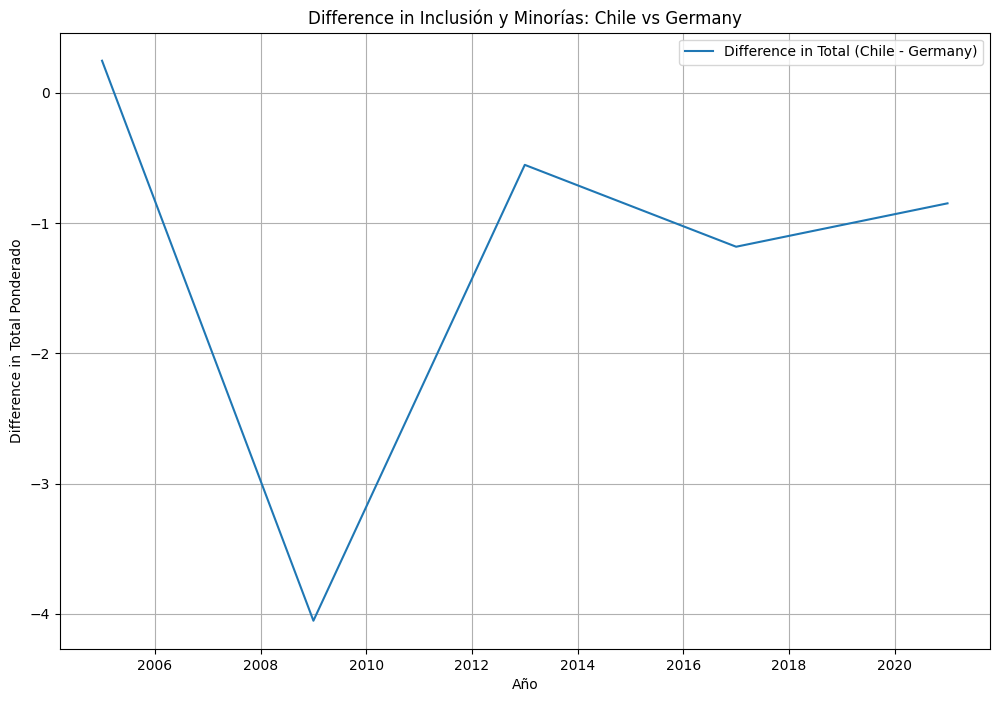

In [48]:
# Merge the two dataframes on 'agno'
df_comparison = pd.merge(df_Chile_inclymin, df_Alemania_inclymin, on='agno', suffixes=('_Chile', '_Germany'))

# Calculate the difference between 'Total' for Chile and Germany
df_comparison['Total_Difference'] = df_comparison['Total_Chile'] - df_comparison['Total_Germany']

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(df_comparison['agno'], df_comparison['Total_Difference'], label='Difference in Total (Chile - Germany)')

plt.xlabel('Año')
plt.ylabel('Difference in Total Ponderado')
plt.title('Difference in Inclusión y Minorías: Chile vs Germany')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
df_comparison

,agno,per503_Chile,per705_Chile,Total_Chile,per503_Germany,per705_Germany,Total_Germany,Total_Difference
0,2005,8.789974,0.515604,9.305577,7.952611,1.106164,9.058775,0.246802
1,2009,7.296178,0.997248,8.293426,9.488878,2.857155,12.346033,-4.052607
2,2013,7.260687,0.000000,7.260687,6.754007,1.059384,7.813391,-0.552705
3,2017,5.341153,1.065976,6.407129,7.549090,0.039297,7.588387,-1.181258
4,2021,6.918945,0.138109,7.057054,7.741342,0.163837,7.905180,-0.848126


#### Veamos la similaridad entre candidatos chilenos en suma de variables 503, 705, 201_2

In [50]:
# Create list named 'variables'
variables = ['per503', 'per705', 'per201_2']

# Create dataframe 'df_Chile_serie_temporal' with columns 'agno', 'candidatename', and columns included in list 'variables'
df_Chile_serie_temporal = df_Chile[['agno', 'candidatename'] + variables]

# Create list 'candidatos_Chile' with unique values of column 'candidatename'
candidatos_Chile = df_Chile['candidatename'].unique()

# Create dataframe 'df_Chile_serie' with columns 'agno' and columns with the names in 'candidatos_Chile'
df_Chile_serie = pd.DataFrame({'agno': df_Chile['agno'].unique()})
for candidato in candidatos_Chile:
    df_Chile_serie[candidato] = np.nan

# Add column 'Total' to 'df_Chile_serie_temporal' with the sum of columns different from 'agno' and 'candidatename'
df_Chile_serie_temporal['Total'] = df_Chile_serie_temporal[variables].sum(axis=1)

# Fill 'df_Chile_serie' with values in column 'Total' of 'df_Chile_serie_temporal', for each 'agno' and 'candidatename'
for _, row in df_Chile_serie_temporal.iterrows():
    df_Chile_serie.loc[df_Chile_serie['agno'] == row['agno'], row['candidatename']] = row['Total']

df_Chile_serie

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_2116/3156384853.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_serie_temporal['Total'] = df_Chile_serie_temporal[variables].sum(axis=1)


,agno,Patricio Aylwin Azocar,Hernán Büchi Buc,Francisco Javier Errázuriz Talavera,Eduardo Frei Ruiz-Tagle,Arturo Alessandri Besa,Ricardo Lagos Escobar,Joaquin Lavin Infante,Michelle Bachelet Jeria,Tomás Hirsch Goldschmidt,...,Marco Enriquez-Ominami,Evelyn Matthei Fornet,José Antonio Kast Rist,Carolina Goic Boroevic,Beatriz de Jesús Sánchez Muñoz,Alejandro René Eleodoro Guillier Álvarez,Gabriel Boric Font,Yasna Provoste Campillay,Sebastián Iglesias Sichel Ramirez,Franco Aldo Parisi Fernández
0,1989,10.822,4.014,21.429,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,NaN,NaN,NaN,10.443,4.665,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999,NaN,NaN,NaN,NaN,NaN,12.5,8.824,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,NaN,NaN,NaN,NaN,NaN,NaN,17.568,9.638,11.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,NaN,NaN,NaN,11.635,NaN,NaN,NaN,NaN,NaN,...,19.517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.770,NaN,...,11.882,3.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.150,NaN,5.151,9.355,11.118,7.998,NaN,NaN,NaN,NaN
7,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.640,NaN,3.250,NaN,NaN,NaN,12.125,10.956,10.814,6.835


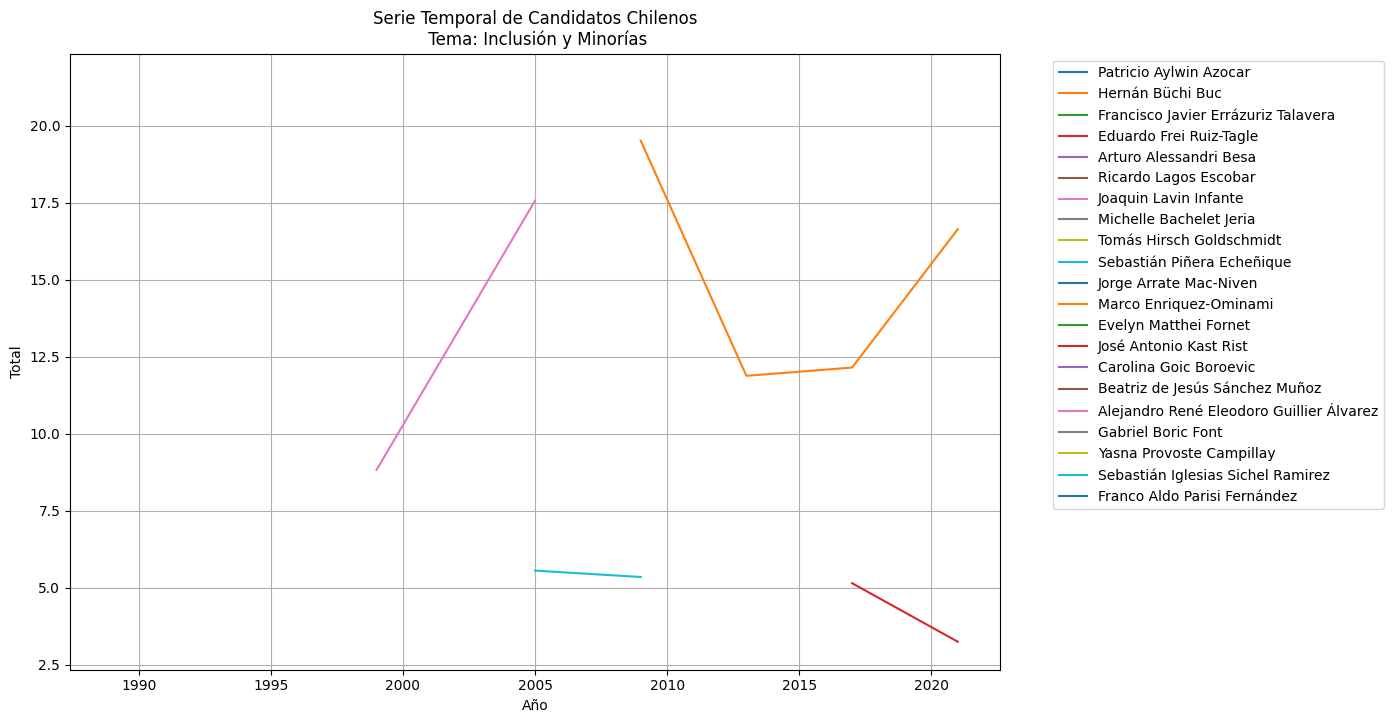

In [52]:
plt.figure(figsize=(12, 8))

# Plot each candidate's 'Total' over the years
for candidato in df_Chile_serie.columns[1:]:
    plt.plot(df_Chile_serie['agno'], df_Chile_serie[candidato], label=candidato)

plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Serie Temporal de Candidatos Chilenos\n Tema: Inclusión y Minorías')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Agreguemos todos los candidatos chilenos en las variables 503, 705, 201_2